In [1]:
!pip h5py --version

ERROR: unknown command "h5py"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 5.1 MB/s 
     |████████████████████████████████| 15.7 MB 34.1 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#50개의 계층으로 구성된 합성곱 신경만, 입력제약이 크고 충분한 메모리가 필요
model = ResNet50(include_top = True,
                weights="imagenet",
                input_tensor = None,
                input_shape = None,
                pooling=None,
                classes=1000)

102981632/102967424 [==============================] - 1s 0us/step


In [4]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [5]:
model.trainable = False
model = Sequential([model,
                   Dense(2, activation='sigmoid')]) #sigmoid 함수가 포함된 밀집층 추가
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 25,638,714
Trainable params: 2,002
Non-trainable params: 25,636,712
_________________________________________________________________


In [6]:
#모델 훈련 환경 설정
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [7]:
!unzip -qq "/content/catanddog.zip"

In [8]:
#모델 훈련 파라미터 설정
batch_size = 32
image_height = 1000
image_width = 1000
train_dir = './train'
valid_dir = './validation'

In [9]:
#ImageDataGenerator: 실시간 데이터 증강을 사용해서 텐서 이미지 데이터 배치를 생성합니다.
#                    데이터에 대해 (배치 단위로) 루프가 순환됩학습의 전처리를 쉽게 할 수 있음
#flow_from_directory: 폴더구조를 그대로 가져와 ImageDataGenerator의 실제 데이터를 채워줌
train = ImageDataGenerator(\
                          rescale = 1./255,#원본영상 0~255의 rgb계수로 구성, 리스케일링하여 0~1 범위로 구성되게 함
                          rotation_range=10,
                          width_shift_range=0.1,
                          height_shift_range=0.1,
                          shear_range=0.1,
                          zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                           target_size=(image_height, image_width),#이미지 실제 사이즈
                                           color_mode='rgb',#흑백 or 컬러
                                           batch_size = batch_size,
                                           seed=1, #이미지 임의로 섞기 위한 랜덤 숫자
                                           shuffle=True, #d이미지 섞을지, 안섞을지
                                           class_mode = 'categorical') #예측할 클래스 두개면 binary, 다중이면 categorical

Found 385 images belonging to 2 classes.


In [10]:
valid = ImageDataGenerator(rescale = 1.0/255.0)
valid_generator = train.flow_from_directory(valid_dir,
                                           target_size=(image_height, image_width),
                                           color_mode='rgb',
                                           batch_size = batch_size,
                                           seed=7,
                                           shuffle=True, 
                                           class_mode = 'categorical')

Found 98 images belonging to 2 classes.


In [ ]:
!ls

In [ ]:
!pip install tensorflow

In [11]:
#history에 모델 학습과정 기록
history = model.fit(train_generator, epochs=10,
                   validation_data=valid_generator, 
                    verbose=2) #verbose 훈련 진행 과정, 0: 무출력, 1: 훈련진행도(진행막재), 2:배치마다 훈련정보 출력

Epoch 1/10
13/13 - 125s - loss: 0.6929 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000 - 125s/epoch - 10s/step
Epoch 2/10
13/13 - 105s - loss: 0.6929 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000 - 105s/epoch - 8s/step
Epoch 3/10
13/13 - 104s - loss: 0.6930 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000 - 104s/epoch - 8s/step
Epoch 4/10
13/13 - 105s - loss: 0.6929 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000 - 105s/epoch - 8s/step
Epoch 5/10
13/13 - 104s - loss: 0.6928 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000 - 104s/epoch - 8s/step
Epoch 6/10
13/13 - 105s - loss: 0.6927 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000 - 105s/epoch - 8s/step
Epoch 7/10
13/13 - 105s - loss: 0.6925 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000 - 105s/epoch - 8s/step
Epoch 8/10
13/13 - 105s - loss: 0.6924 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000 - 105s/epoch - 8s/step
Epoch 9/10
13/1

In [15]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


NanumBarunGothic


<Figure size 432x288 with 0 Axes>

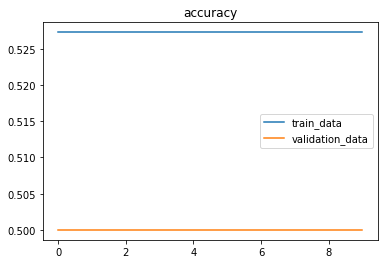

<Figure size 432x288 with 0 Axes>

In [26]:
#history에 기록된 모델 정확도 시각화
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib import font_manager

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = font_manager.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

accuracy = history.history['accuracy'] #학습 당시의 accuracy
val_accuracy = history.history['val_accuracy'] #validation_set으로 측정한 accuracy

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label='train_data')
plt.plot(epochs, val_accuracy, label='validation_data')
plt.legend() #범례표시
plt.title('accuracy')
plt.figure()

<Figure size 432x288 with 0 Axes>

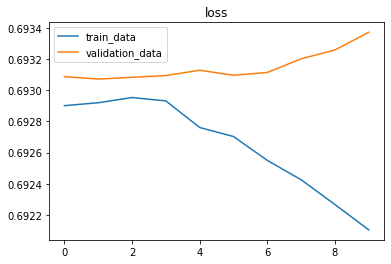

<Figure size 432x288 with 0 Axes>

In [27]:
plt.plot(epochs, loss, label='train_data')
plt.plot(epochs, val_loss, label='validation_data')
plt.legend() #범례표시
plt.title('loss')
plt.figure()

In [32]:
class_name = ['cat', 'dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values=np.argmax(prediction_values,axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, 
                    hspace=0.05,
                   wspace=0.05)

for ii in range(8):
    ax = fig.add_subplot(2, 4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

ValueError: ignored